<a href="https://colab.research.google.com/github/Krish1599/PersonalLoan/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Desciption
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

#Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.),
the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

##Impoting required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Loading the data

In [2]:
from google.colab import files
f = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

##Checking the data content:
Checking for columns present, it's data types, any missing value or invalid values.

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


There are 12 features out of which personal loan will be our target.
1. Age - Customer's age in completed years
2. Experience	- years of professional experience
3. Income	- Annual income of the customer
4. Family	- Family size of the customer
5. CCAvg	- Avg. spending on credit cards per month
6. Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/professional
7. Mortgage	- Value of house mortgage if any. ($000)	 	 
8. Personal Loan - Did this customer accept the personal loan offered in the last campaign?
9. Securities - Account	Does the customer have a securities account with the bank?
10. CD Account	- Does the customer have a certificate of deposit (CD) account with the bank?
11. Online	- Does the customer use internet banking facilities?	 
12. CreditCard	 - Does the customer use a credit card issued by UniversalBank?
							

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.shape

(5000, 14)

In [8]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [9]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Removing 
1. ID - as it is unique for every customer.
2. ZIP code - processing this data might bring down the performance of my model, due to high number of unique categorigal data. Moreover it is highly uncorrelated with personal Loan and might not help in the model.
3. Experience - as it is highly corelated with Age and Experience data has some irrelavent

In [10]:
df = df.drop(columns=['ID','ZIP Code', 'Experience'])

# EDA

In [11]:
df.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [12]:
(df.Mortgage==0).sum()

3462

In [13]:
(df.CCAvg==0).sum()

106

In [14]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [15]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [16]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [17]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [18]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [19]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

The age group is a multi modal distribution, but mimics a normal distribution

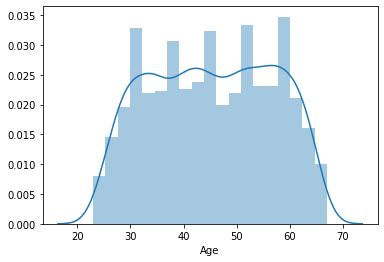

In [20]:
sns.distplot(df.Age)

Income and CCAvg Distribution is positively skewed

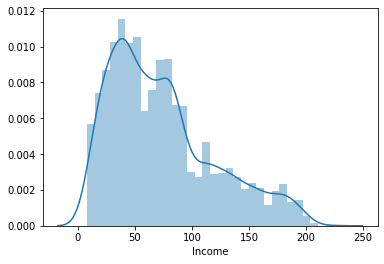

In [21]:
sns.distplot(df.Income)

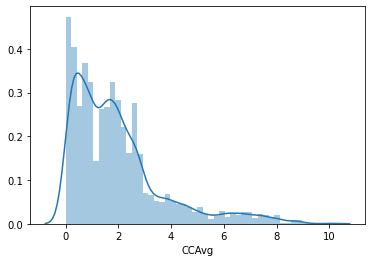

In [22]:
sns.distplot(df.CCAvg)

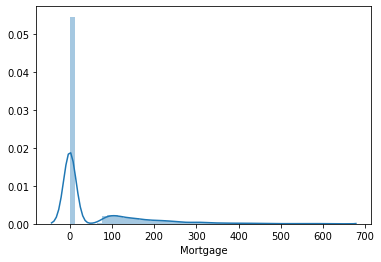

In [23]:
sns.distplot(df.Mortgage)

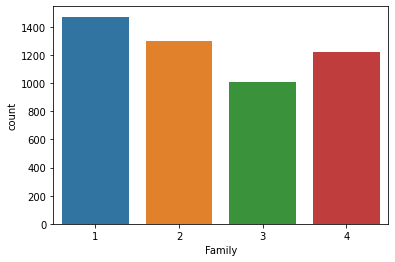

In [24]:
sns.countplot(df.Family)

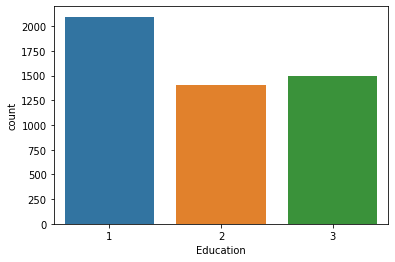

In [25]:
sns.countplot(df.Education)

The below plot shows that people with low Income are prone not to take Personal Loans.

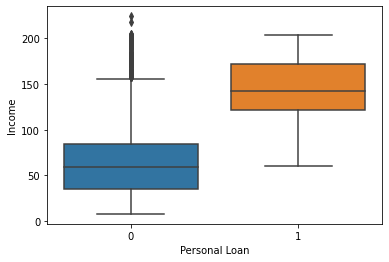

In [26]:
sns.boxplot(x='Personal Loan',y='Income',data =df)

Text(0.5, 0, 'Income')

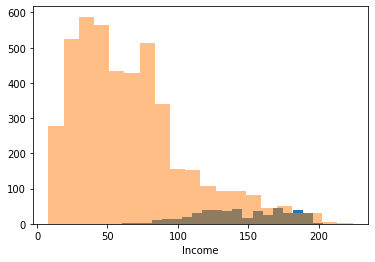

In [27]:
plt.hist( df.Income[df['Personal Loan']==1],20,alpha = 1 )
plt.hist(df.Income[df['Personal Loan']==0],20,alpha = 0.5, )
plt.xlabel('Income')

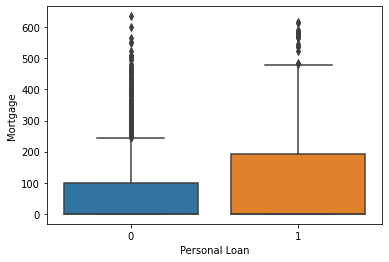

In [28]:
sns.boxplot(x='Personal Loan',y='Mortgage',data =df)

Text(0.5, 0, 'Mortgage')

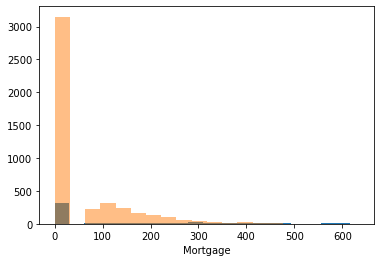

In [29]:
plt.hist( df.Mortgage[df['Personal Loan']==1],20,alpha = 1 )
plt.hist(df.Mortgage[df['Personal Loan']==0],20,alpha = 0.5, )
plt.xlabel('Mortgage')

Majority of People who dont have a CD account dont tend to take Personal loan but people with CD account they almost equally tend to take Personal loan.

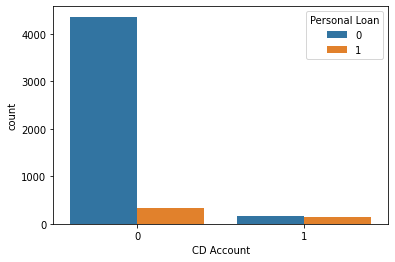

In [30]:
sns.countplot(data = df,x = 'CD Account', hue='Personal Loan')

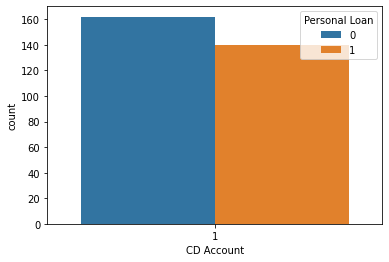

In [31]:
sns.countplot(data = df[df['CD Account']==1],x = 'CD Account', hue='Personal Loan')

Majority of People with Securties account dont tend to take Personal Loans

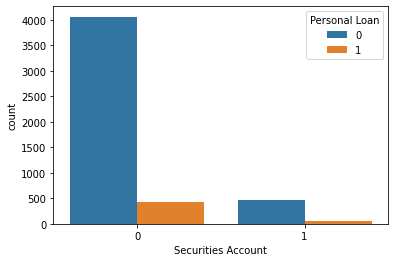

In [32]:
sns.countplot(data = df, x= 'Securities Account',hue = 'Personal Loan')

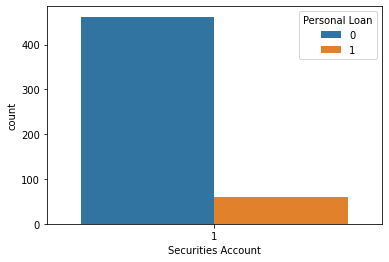

In [33]:
sns.countplot(data = df[df['Securities Account']==1], x= 'Securities Account',hue = 'Personal Loan')

There is a little high correlation between CCAvg and Income. Otherwise the data appears to be Random.

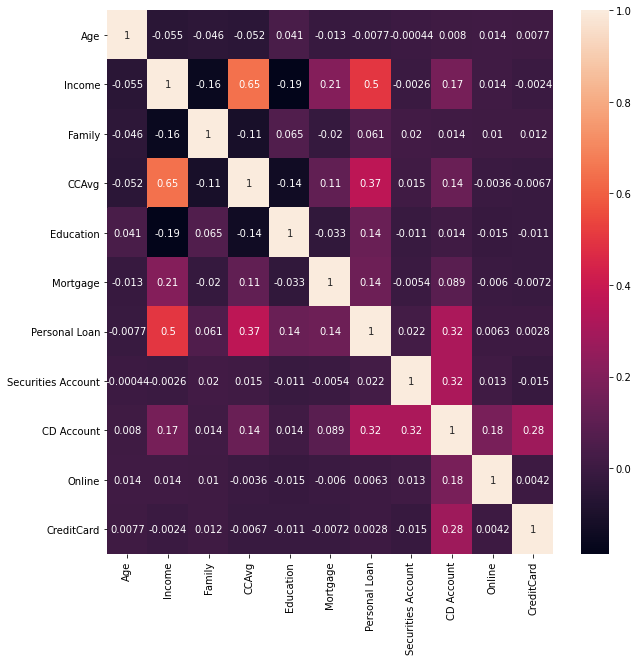

In [34]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,)

The pie chart shows that the data contains disproportionate numbers for each value so we use stratified sampling so as to preserve the percentage appearing in both training and test data.

([<matplotlib.patches.Wedge at 0x7f2268e49e48>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.3368103226196453, -0.41585834287358026, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4'),
  Text(0.8593780645412004, -0.2673375061330159, '9.6')])

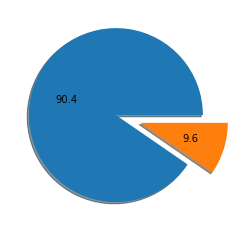

In [36]:
plt.pie(df['Personal Loan'].value_counts(),shadow=True,explode=[0,0.3],autopct='%1.1f')

Preprocessing the data to rectify the skewness and outliers of the Features Income, Mortgage and CCAvg.

Categorizing the Mortgage data to 0 and 1 where 0 means no mortgage and 1 means the person has taken some mortgage

In [37]:
df.Mortgage[df.Mortgage!=0]=1
df.Mortgage.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([0, 1])

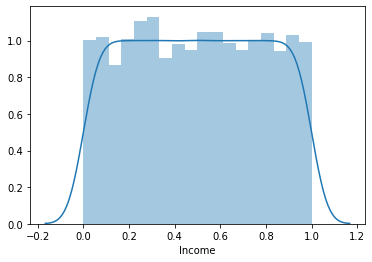

In [38]:
from sklearn.preprocessing import QuantileTransformer
t = QuantileTransformer()
df['Income'] = t.fit_transform(df['Income'].values.reshape(-1,1))
sns.distplot(df.Income)

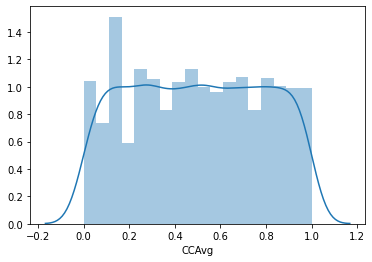

In [39]:
df['CCAvg'] = t.fit_transform(df['CCAvg'].values.reshape(-1,1))
sns.distplot(df.CCAvg)

Taking the features and targets

In [40]:
x_data = df.drop(columns=['Personal Loan'])
y_data = df['Personal Loan']

Splitting the data into test data and training data

In [41]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x_data,y_data, test_size = 0.3, stratify = y_data,random_state = 3)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LogR = LogisticRegression()
LogR.fit(Xtrain,Ytrain)
ypred = LogR.predict(Xtest)
yprob = LogR.predict_proba(Xtest)
ypredt= LogR.predict(Xtrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
metrics.accuracy_score(Ytest,ypred),metrics.accuracy_score(Ytrain,ypredt)


(0.9533333333333334, 0.9565714285714285)

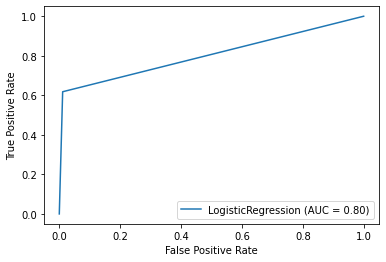

In [44]:
fpr,tpr,th = metrics.roc_curve(Ytest,ypred)
area = metrics.roc_auc_score(Ytest,ypred)
metrics.RocCurveDisplay(fpr,tpr,area,'LogisticRegression').plot()
plt.show()

In [45]:
	metrics.f1_score(Ytest,ypred)

0.7177419354838711

In [46]:
metrics.precision_score(Ytest,ypred),metrics.recall_score(Ytest,ypred)

(0.8557692307692307, 0.6180555555555556)

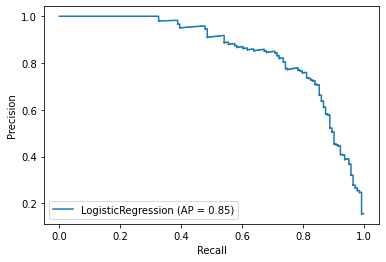

In [47]:
metrics.plot_precision_recall_curve(LogR, Xtest,Ytest)
plt.show()

In [48]:
metrics.log_loss(Ytest,yprob)

0.12028512486219885

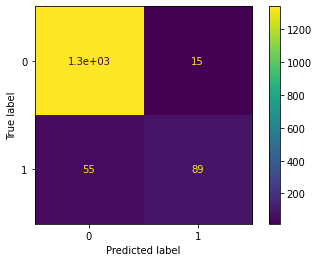

In [49]:
metrics.plot_confusion_matrix(LogR,Xtest,Ytest)

In [50]:
from sklearn.tree import DecisionTreeClassifier
DecT = DecisionTreeClassifier(random_state =  0,max_depth=5)
DecT.fit(Xtrain,Ytrain)
ypredT = DecT.predict(Xtest)
yprobT = DecT.predict_proba(Xtest)
ypredtT = DecT.predict(Xtrain)

In [51]:
metrics.accuracy_score(Ytest,ypredT),metrics.accuracy_score(Ytrain,ypredtT)

(0.9833333333333333, 0.9897142857142858)

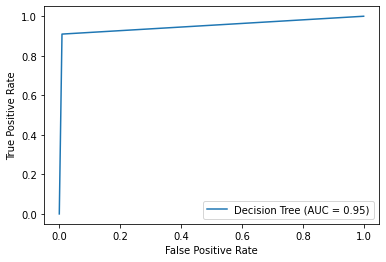

In [52]:
fpr,tpr,th = metrics.roc_curve(Ytest,ypredT)
area = metrics.roc_auc_score(Ytest,ypredT)
metrics.RocCurveDisplay(fpr,tpr,area,'Decision Tree').plot()
plt.show()

In [53]:
	metrics.precision_score(Ytest,ypredT),	metrics.recall_score(Ytest,ypredT)

(0.916083916083916, 0.9097222222222222)

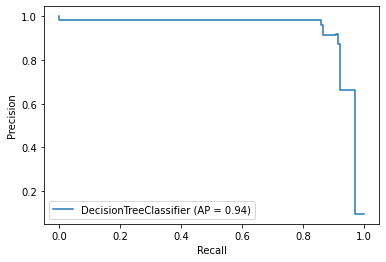

In [54]:
metrics.plot_precision_recall_curve(DecT, Xtest,Ytest)
plt.show()

In [55]:
metrics.log_loss(Ytest,yprobT)

0.16760001147804027

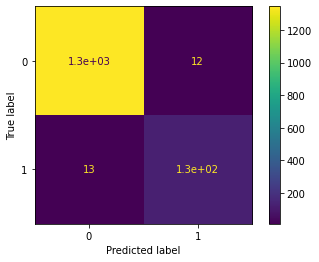

In [56]:
metrics.plot_confusion_matrix(DecT,Xtest,Ytest)

Decision Tree has overfitted the training data and the log loss value is quite high. so we restrict the depth of the Decision tree, which appears to perform better.

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold,cross_val_score
D = DecisionTreeClassifier(random_state=0,max_depth=5)
kfold = KFold(n_splits = 100)
bag = BaggingClassifier(base_estimator=D,n_estimators=100)
result = cross_val_score(bag,x_data,y_data,cv = kfold)

In [58]:
print(result.mean())
print(result)

0.9856
[0.988 0.988 0.986 0.982 0.978 0.984 0.99  0.988 0.99  0.982]


After applying the baggling classifier it can be seen that the decision tree gives approximately the same value.

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(Xtrain,Ytrain)
ypredrf = rf.predict(Xtest)
yprobrf = rf.predict_proba(Xtest)
ypredtrf = rf.predict(Xtrain)

In [59]:
metrics.accuracy_score(Ytest,ypredrf),metrics.accuracy_score(Ytrain,ypredtrf)

(0.9853333333333333, 1.0)

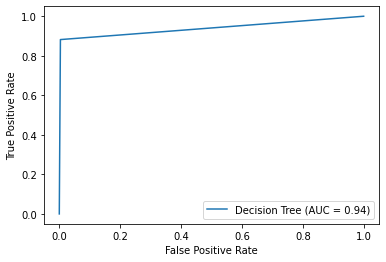

In [60]:
fpr,tpr,th = metrics.roc_curve(Ytest,ypredrf)
area = metrics.roc_auc_score(Ytest,ypredrf)
metrics.RocCurveDisplay(fpr,tpr,area,'Decision Tree').plot()
plt.show()

In [61]:
metrics.log_loss(Ytest,yprobrf)

0.04349199063758119

In [62]:
metrics.f1_score(Ytest,ypredrf)

0.9202898550724637

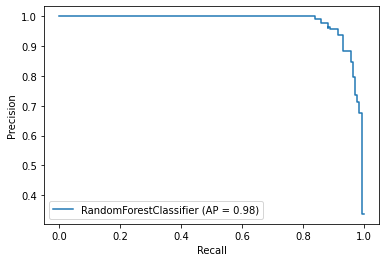

In [63]:
metrics.plot_precision_recall_curve(rf, Xtest,Ytest)
plt.show()

In [65]:
metrics.precision_score(Ytest,ypredrf),metrics.recall_score(Ytest,ypredrf)

(0.9621212121212122, 0.8819444444444444)

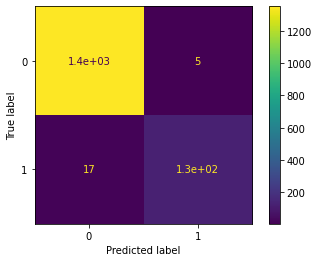

In [78]:
metrics.plot_confusion_matrix(rf,Xtest,Ytest)

Random Forest Gives a good result with high F1 score and very less log loss.

# A Business point of view:
Those annoying phone calls and messages for loan policies really does get irritating, but this is just the customer point of view. The companies spend a lot of their resources in these types of mass advertisement. To limit the spending on these resourses, they can target a particular set of people who might want a loan, rather than broadcasting to whole world. But interpretting about a customer’s loan needs takes a huge amount of time and money, so much so that the individual may get the knowledege of existance of certain policies a little too late, making all the efforts go in vain. So, with population so large it seems convincing to the company to mass advertise instead.  

---

This Model interprets the given data and is able to predict whether an indvidual is expected to take any Personal Loans. It is very fast and accurate. It segments the customers and helps in better delivery of the policies to the supossedly concerned people rather than the whole, which saves a lot of time and money. After changing the focus to a particular population, the recomendation of policies to each individual according to thier needs becomes more efficient and helps in employing better services to the customer. This minimizes the spending of the resources and facilitates better growth in providing their services and also taking the company as a whole.


---
